In [2]:
import pandas as pd
import numpy as np


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("android-games.csv")

In [4]:
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [5]:
df.shape

(1730, 15)

In [6]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [8]:
df.describe()

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


In [9]:
df.installs.value_counts()

10.0 M      805
50.0 M      252
5.0 M       245
100.0 M     204
1.0 M       192
500.0 k      15
500.0 M      12
100.0 k       3
1000.0 M      2
Name: installs, dtype: int64

In [10]:
def in_thousand (inst) :
    if inst == "500.0 k" :
        return "0.5 M"
    elif inst == "100.0 k" :
        return "0.1 M"
    else :
        return inst

In [11]:
df['installs']= df['installs'].apply(in_thousand)

In [12]:
df['installs']= df['installs'].str.replace( 'M', '').str.strip().astype('float')

In [13]:
df.installs.value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs, dtype: int64

In [14]:
df = df.rename(columns = {"installs": "in_million_install"})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                1730 non-null   int64  
 1   title               1730 non-null   object 
 2   total ratings       1730 non-null   int64  
 3   in_million_install  1730 non-null   float64
 4   average rating      1730 non-null   int64  
 5   growth (30 days)    1730 non-null   float64
 6   growth (60 days)    1730 non-null   float64
 7   price               1730 non-null   float64
 8   category            1730 non-null   object 
 9   5 star ratings      1730 non-null   int64  
 10  4 star ratings      1730 non-null   int64  
 11  3 star ratings      1730 non-null   int64  
 12  2 star ratings      1730 non-null   int64  
 13  1 star ratings      1730 non-null   int64  
 14  paid                1730 non-null   bool   
dtypes: bool(1), float64(4), int64(8), object(2)
memory usag

In [16]:
df.columns

Index(['rank', 'title', 'total ratings', 'in_million_install',
       'average rating', 'growth (30 days)', 'growth (60 days)', 'price',
       'category', '5 star ratings', '4 star ratings', '3 star ratings',
       '2 star ratings', '1 star ratings', 'paid'],
      dtype='object')

In [17]:
df.in_million_install.value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: in_million_install, dtype: int64

In [18]:
df.price.value_counts()

0.00    1723
1.99       3
1.49       1
0.99       1
2.99       1
7.49       1
Name: price, dtype: int64

In [19]:
df.paid.value_counts()

False    1723
True        7
Name: paid, dtype: int64

In [20]:
df = df.drop("price", axis = 1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                1730 non-null   int64  
 1   title               1730 non-null   object 
 2   total ratings       1730 non-null   int64  
 3   in_million_install  1730 non-null   float64
 4   average rating      1730 non-null   int64  
 5   growth (30 days)    1730 non-null   float64
 6   growth (60 days)    1730 non-null   float64
 7   category            1730 non-null   object 
 8   5 star ratings      1730 non-null   int64  
 9   4 star ratings      1730 non-null   int64  
 10  3 star ratings      1730 non-null   int64  
 11  2 star ratings      1730 non-null   int64  
 12  1 star ratings      1730 non-null   int64  
 13  paid                1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(2)
memory usage: 177.5+ KB


# Analysis

In [33]:
df["category"].value_counts()

GAME CARD            126
GAME WORD            104
GAME RACING          100
GAME STRATEGY        100
GAME MUSIC           100
GAME SPORTS          100
GAME CASINO          100
GAME ROLE PLAYING    100
GAME CASUAL          100
GAME SIMULATION      100
GAME ARCADE          100
GAME ACTION          100
GAME PUZZLE          100
GAME EDUCATIONAL     100
GAME ADVENTURE       100
GAME BOARD           100
GAME TRIVIA          100
Name: category, dtype: int64

In [31]:
df.category.value_counts(normalize=True)

GAME CARD            0.072832
GAME WORD            0.060116
GAME RACING          0.057803
GAME STRATEGY        0.057803
GAME MUSIC           0.057803
GAME SPORTS          0.057803
GAME CASINO          0.057803
GAME ROLE PLAYING    0.057803
GAME CASUAL          0.057803
GAME SIMULATION      0.057803
GAME ARCADE          0.057803
GAME ACTION          0.057803
GAME PUZZLE          0.057803
GAME EDUCATIONAL     0.057803
GAME ADVENTURE       0.057803
GAME BOARD           0.057803
GAME TRIVIA          0.057803
Name: category, dtype: float64

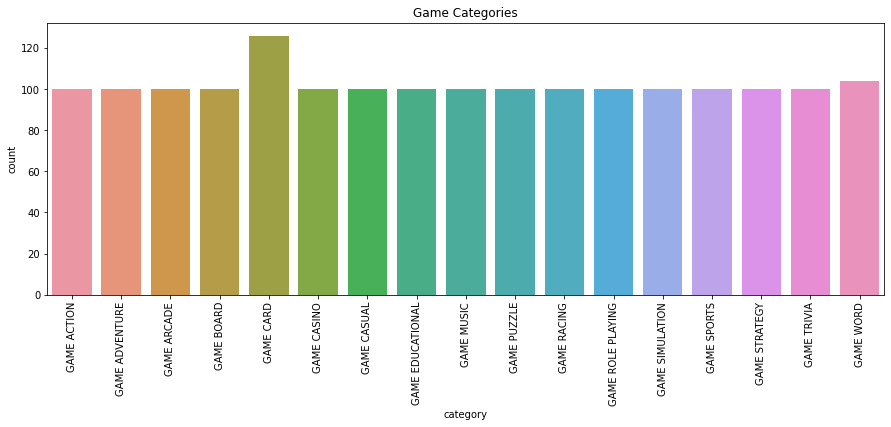

In [25]:
plt.figure(figsize=(15,5))

plt.title("Game Categories")

sns.countplot(x = "category", data = df)
plt.xticks(rotation = 90);

# Total Ratings

In [ ]:
# kaan hocanın
# fig = px.histogram(df, x="category", title='Game Categories')
# fig.update_layout(xaxis={'categoryorder':'total descending'}) 
# fig.show()

In [26]:
df["total ratings"].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

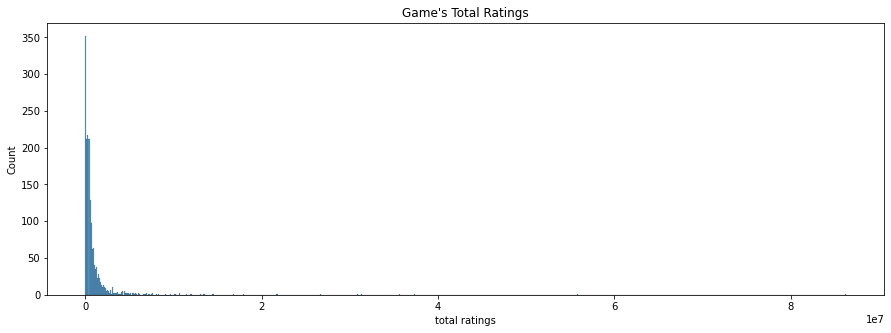

In [39]:
plt.figure(figsize=(15,5))
plt.title("Game's Total Ratings")
sns.histplot(data=df, x ="total ratings");

In [30]:
# Kaan hocanın 

# fig1 = px.box(df, "total ratings", title=" Games Total Ratings")

# fig1.show()


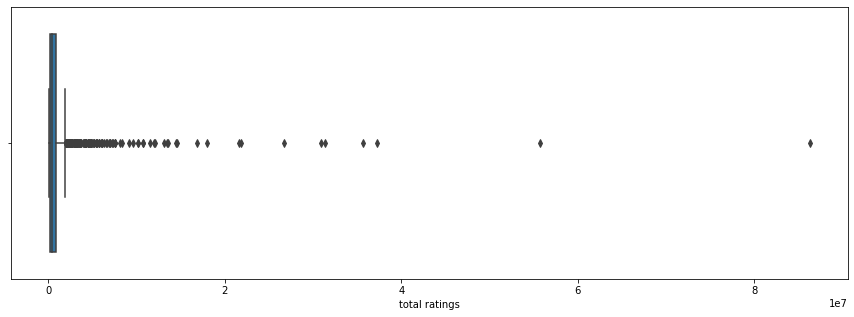

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x ="total ratings");

In [41]:
df.in_million_install.describe()

count    1730.000000
mean       29.176185
std        60.287333
min         0.100000
25%         5.000000
50%        10.000000
75%        50.000000
max      1000.000000
Name: in_million_install, dtype: float64

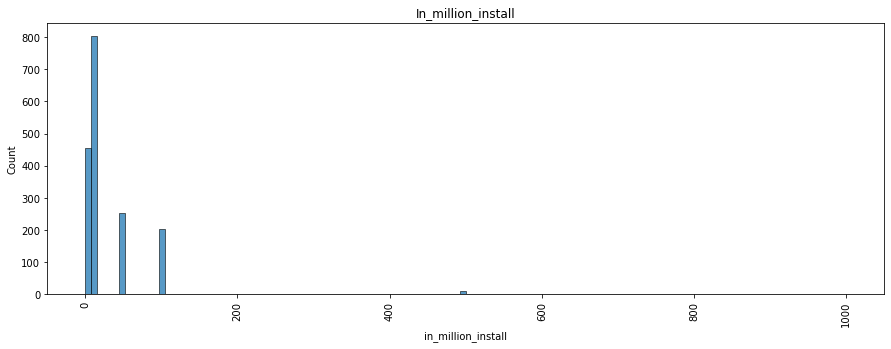

In [44]:
plt.figure(figsize=(15,5))

plt.title("In_million_install")

sns.histplot(x = "in_million_install", data = df)
plt.xticks(rotation = 90);

In [47]:
# fig = px.histogram(df, x= 'in_million_install', title='Number of Game Install in Millions')

# fig.show()

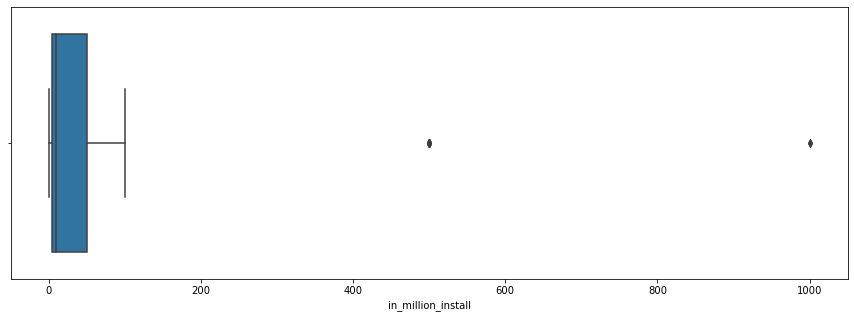

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x ="in_million_install");

In [52]:
# fig = px.box(df, x= 'in_million_install', hover_data = df[['title','category']])
# fig.update_traces(quartilemethod="inclusive")
# fig.show()

# Paid-Free Games

In [54]:
df.paid.value_counts(normalize=True)

False    0.995954
True     0.004046
Name: paid, dtype: float64

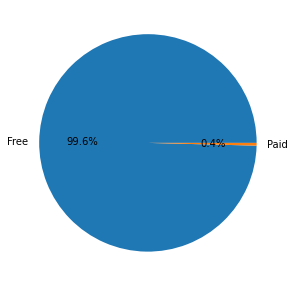

In [68]:
y = df.paid.value_counts()

mylabels = ["Free", "Paid"]

plt.figure(figsize=(7,5))

myexplode = [0, 0]

plt.pie(y, labels = mylabels, labeldistance = 1.1, 
        explode = myexplode, 
        startangle = 0, 
        autopct = '%1.1f%%')

plt.show()

In [70]:
# paid_free= df['paid'].value_counts()
# label =['Free','Paid']
# fig = px.pie(paid_free, values=df['paid'].value_counts().values, names=label,
#              title='Paid & Free Games')
# fig.update_traces(textposition='inside', textinfo='percent+label')
# fig.show()

# Total Ratings by Category

In [73]:
total_ratings_by_category = df.groupby('category')['total ratings'].mean()
total_ratings_by_category

category
GAME ACTION          4.011344e+06
GAME ADVENTURE       8.935617e+05
GAME ARCADE          1.793780e+06
GAME BOARD           4.457431e+05
GAME CARD            3.326041e+05
GAME CASINO          3.619031e+05
GAME CASUAL          2.470866e+06
GAME EDUCATIONAL     1.529804e+05
GAME MUSIC           2.163020e+05
GAME PUZZLE          9.466929e+05
GAME RACING          1.139027e+06
GAME ROLE PLAYING    7.087648e+05
GAME SIMULATION      9.341417e+05
GAME SPORTS          1.353829e+06
GAME STRATEGY        1.856570e+06
GAME TRIVIA          2.982217e+05
GAME WORD            3.943603e+05
Name: total ratings, dtype: float64

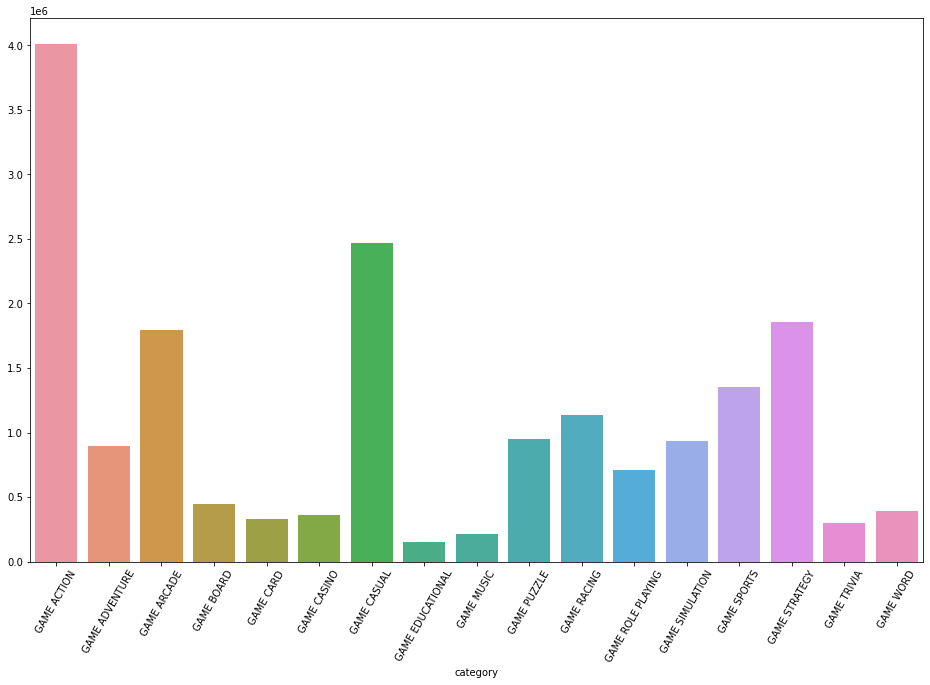

In [83]:
plt.figure(figsize = (16,10))
sns.barplot(data = df, x = total_ratings_by_category.index, y= total_ratings_by_category.values)

plt.xticks(rotation = 60);
plt.show()
